# Predicting Feedback on Online Food Orders Using Logistic Regression

**Objective:** Develop a logistic regression model to predict the customer feedback (positive/negative) on online food orders. This task involves data loading, preprocessing, exploratory data analysis (EDA), model building, evaluation, and visualization.

**Submitted by:** Neil Ivan S. Orencia

In [ ]:
# Importing necessary libraries for logistic regression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.exceptions import UndefinedMetricWarning

## Part 1: Data Loading and Preprocessing

### Load the Dataset

Import the dataset using Pandas and display the first few rows to understand its structure.

In [ ]:
# Loading the dataset called "onlinefoods.csv"
df = pd.read_csv('onlinefoods.csv')

# Displaying the first few rows of the dataset
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


### Handle Missing Values

Identify and handle any missing values in the dataset.  Choose an appropriate strategy (e.g., imputation or removal) based on the context.

In [ ]:
# Checking for missing values in each column
df.isnull().sum()
# Since there is no missing values as shown in the results, no imputation or removal have been done

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

### Encode Categorical Variables

Convert categorical variables into a numeric format suitable for logistic regression. Consider techniques like one-hot encoding or label encoding.

In [ ]:
# Selecting categorical columns for one-hot encoding
categorical_cols = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output', 'Feedback', 'Unnamed: 12']

# Using the get_dummies() function for one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols)

# Displaying the first few rows of the dataset
df.head()

,Age,Family size,latitude,longitude,Pin code,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,...,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_No,Output_Yes,Feedback_Negative,Feedback_Positive,Unnamed: 12_No,Unnamed: 12_Yes
0,20,4,12.9766,77.5993,560001,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,1
1,24,3,12.9770,77.5773,560009,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
2,22,3,12.9551,77.6593,560017,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,1
3,22,6,12.9473,77.5616,560019,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
4,22,4,12.9850,77.5533,560010,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,1


### Feature Selection

Identify which features to include in the model. Justify your selections based on the dataset's context and preliminary analysis.

In [ ]:
# Defining features (X) by dropping the 'Feedback_Positive' column from the dataset
X = df.drop(['Feedback_Positive'], axis=1)

# Defining target variable (y) as the 'Feedback_Positive' column
y = df['Feedback_Positive']

Selection justification based on the dataset's context and preliminary analysis:

1. **Gender**: Gender can potentially influence customer feedback, as preferences or experiences related to online food orders may vary between genders. For example, certain types of cuisines or food delivery services might be more popular among different genders.

2. **Marital Status**: Marital status might impact online food ordering behavior. For instance, married individuals may order food differently compared to single individuals, such as ordering for family meals.

3. **Occupation**: Occupation can provide insights into the lifestyle and time constraints of customers, which can influence their online food ordering habits. For example, busy professionals might order food more frequently for convenience.

4. **Monthly Income**: Monthly income is a significant factor that can affect spending habits and the frequency of online food orders. Higher income levels may lead to more frequent and higher-value orders.

5. **Educational Qualifications**: Educational qualifications may reflect preferences or behaviors related to food choices and ordering patterns. For example, individuals with higher education levels might prioritize health-conscious options.

6. **Output**: It's not clear what "Output" represents in the dataset without further context but it could possibly be related to something with great significance.

7. **Unnamed: 12**: The inclusion of "Unnamed: 12" in feature selection may require clarification or further analysis but it's possible that this column contains relevant information related to customer behavior or other details.

8. **Feedback**: The target variable, "Feedback," is crucial as it directly represents the customer's feedback on their online food orders. This variable is the outcome that the logistic regression model aims to predict through positive or negative.

## Part 2: Exploratory Data Analysis (EDA)

### Descriptive Statistics

Use `.describe()` to summarize the numeric columns. Highlight any interesting findings.

In [ ]:
# Using descriptive statistics to summarize numeric columns
df.describe()

,Age,Family size,latitude,longitude,Pin code,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,...,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_No,Output_Yes,Feedback_Negative,Feedback_Positive,Unnamed: 12_No,Unnamed: 12_Yes
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,...,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402,0.427835,0.572165,0.278351,0.030928,0.690722,...,0.059278,0.448454,0.030928,0.005155,0.224227,0.775773,0.182990,0.817010,0.224227,0.775773
std,2.975593,1.351025,0.044489,0.051354,31.399609,0.495404,0.495404,0.448766,0.173346,0.462793,...,0.236450,0.497978,0.173346,0.071703,0.417611,0.417611,0.387157,0.387157,0.417611,0.417611
min,18.000000,1.000000,12.865200,77.484200,560001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Findings based on descriptive statistics of the numeric columns:

1. **Age**: The mean age is around 24-25 years, with a minimum of 18 and a maximum of 33 years. This meant that the dataset primarily consists of young adults or individuals in their early to mid-twenties.
2. **Family Size**: The mean family size is around 3, with a minimum of 1 and a maximum of 6. This indicates that the dataset includes a mix of small and larger families, with a significant portion being smaller households.
3. **Latitude, Longitude and Pin Code**: The latitude values range from 12.9 to 13.1 which could indicate that customers are located within a specific geographical region. Similarly, the longitude values range from 77.5 to 77.8 which shows the longitude spread within the region.
4. **Marital Status**: The majority of the individuals are single (69%), followed by married (27.8%), and a small percentage (3.1%) preferred not to disclose their marital status.
5. **Occupation**: The largest group is students (53.3%), followed by employees (30.4%), self-employed individuals (13.9%), and housewives (2.3%). This distribution suggests that the dataset may be skewed towards individuals who are still studying or in the early stages of their careers.
6. **Educational Qualifications**: The majority of individuals have either a graduate (45.6%) or a post-graduate (44.8%) degree, with a smaller percentage holding a Ph.D. (5.9%) or only having a school education (3.1%). There are very few uneducated individuals (0.5%) in the dataset.
7. **Gender**: The dataset seems to be relatively balanced in terms of gender, with 57.2% males and 42.8% females.

### Visualizations

Create visualizations to understand the relationships between features and the target variable. Suggestions include:
- Distribution of Age and its impact on Feedback.
- Proportions of Feedback across different levels of Monthly Income.
- Correlation matrix heatmap to identify any interesting correlations between features.

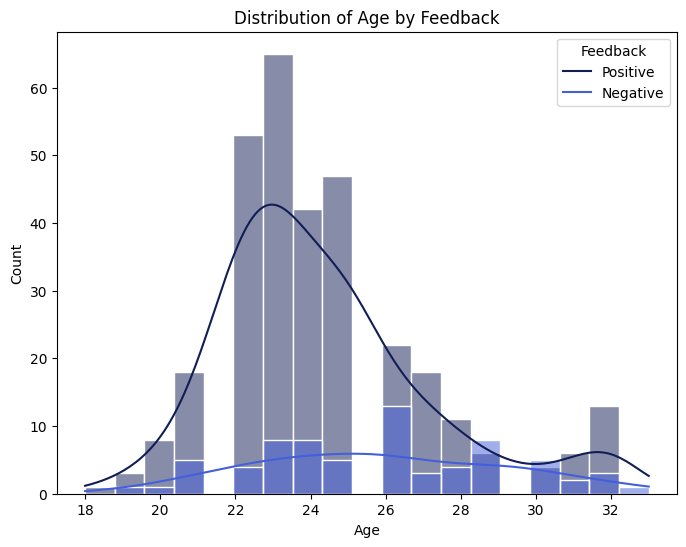

In [ ]:
# Visualization for the "Distribution of Age and its impact on Feedback"
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Age", hue="Feedback_Positive", kde=True, palette=["#445FDA", "#111D55"], edgecolor='white')
plt.title("Distribution of Age by Feedback")
plt.legend(title='Feedback', labels=['Positive', 'Negative'])
plt.show()

<Figure size 1000x600 with 0 Axes>

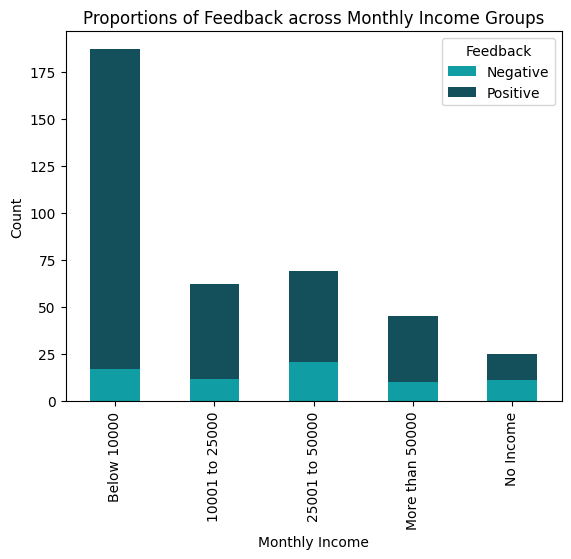

In [ ]:
# Visualization for the "Proportions of Feedback across different levels of Monthly Income"
plt.figure(figsize=(10, 6))
monthly_income_groups = df.groupby(['Monthly Income_Below Rs.10000',
                                    'Monthly Income_10001 to 25000',
                                    'Monthly Income_25001 to 50000',
                                    'Monthly Income_More than 50000',
                                    'Monthly Income_No Income',
                                    'Feedback_Positive']).size().unstack('Feedback_Positive')
labels = ['Below 10000', '10001 to 25000', '25001 to 50000', 'More than 50000', 'No Income']
monthly_income_groups.plot(kind='bar', stacked=True, color=["#119DA4", "#13505B"])
plt.title("Proportions of Feedback across Monthly Income Groups")
plt.xticks(range(len(labels)), labels)
plt.legend(title='Feedback', labels=['Negative', 'Positive'])
plt.xlabel("Monthly Income")
plt.ylabel("Count")
plt.show()

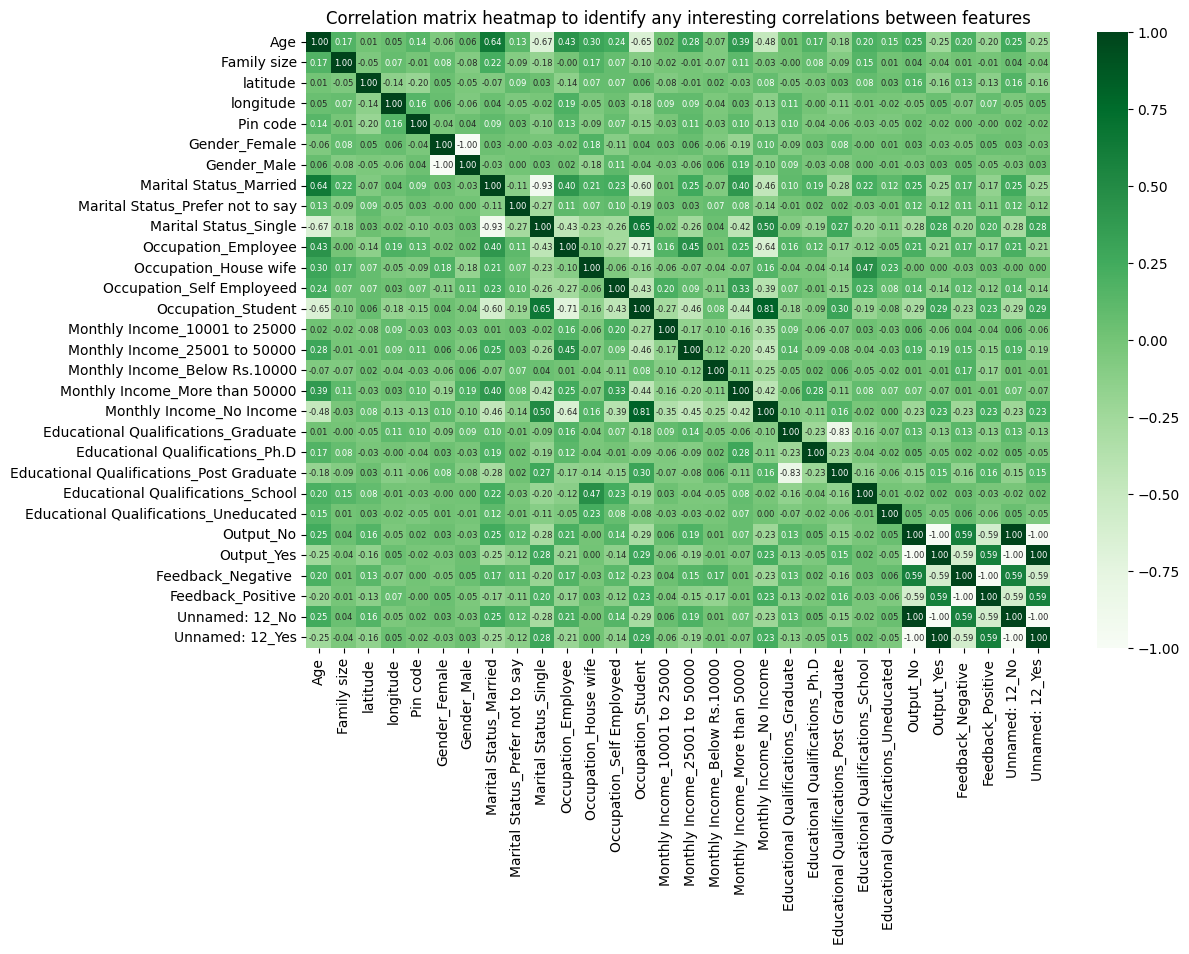

In [ ]:
# Visualization for the "Correlation matrix heatmap to identify any interesting correlations between features"
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="Greens", annot_kws={"fontsize": 6}, fmt=".2f")
plt.title("Correlation matrix heatmap to identify any interesting correlations between features")
plt.show()

## Part 3: Logistic Regression Model

### Build the Model

Implement a logistic regression model using scikit-learn. Split your data into training and test sets to evaluate the model's performance.

In [ ]:
# Defining the features (X) and target variable (y)
X = df.drop(['Feedback_Positive'], axis=1)
y = df['Feedback_Positive']

# Spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Instantiating and fitting the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

### Model Evaluation

Assess your model's performance using appropriate metrics, such as accuracy, precision, recall, and the confusion matrix. Discuss the results.

In [ ]:
# Calculating accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


In [ ]:
# Printing the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 0 19]
 [ 0 98]]


In [ ]:
# Printing the classification report
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.84      1.00      0.91        98

    accuracy                           0.84       117
   macro avg       0.42      0.50      0.46       117
weighted avg       0.70      0.84      0.76       117



## Part 4: Data Analysis and Visualization

### Feature Importance

Analyze and visualize the importance of different features in your logistic regression model. Discuss how each feature influences the prediction of Feedback.

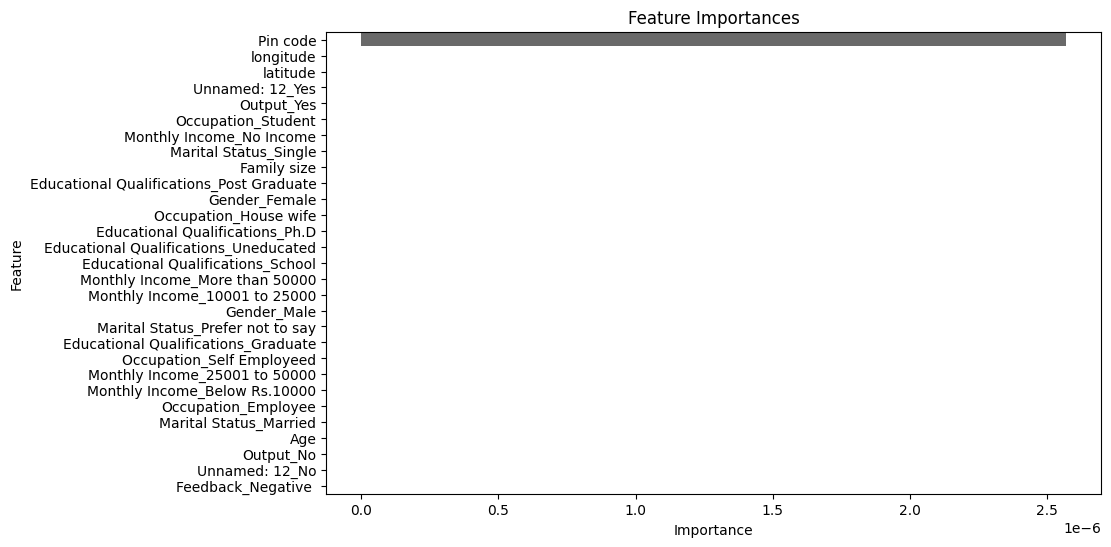

In [ ]:
# Getting the feature importances from the logistic regression model
feature_importances = pd.DataFrame(
    zip(X_train.columns, model.coef_[0]), columns=["Feature", "Importance"]
)
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Visualizing feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances, color="dimgray")
plt.title("Feature Importances")
plt.show()

The generated chart aboves displays the feature importances or coefficients of different features used in a logistic regression model. The x-axis represents the importance values, while the y-axis lists the feature names.

Some key observations from the feature importance chart:
1. Location features (Pin code, longitude, latitude) have the highest positive importances which indicates that geographic location or delivery area significantly contributes to predicting positive feedback on online food orders.
2. Features like "Unnamed: 12 Yes", "Output Yes", and "Occupation_Student" also have relatively high positive importances, suggesting they are associated with positive feedback.
3. Features with high negative importances, such as "Monthly Income_No Income", "Marital Status_Single", and "Family size", tend to contribute more towards predicting negative feedback.
4. Certain demographic features like "Gender_Female", "Occupation_House wife", and educational qualifications like "Post Graduate" have moderate positive importances, potentially linked to positive feedback.
5. Other features like "Gender_Male", "Marital Status_Prefer not to say", and some income levels have moderate negative importances, implying their association with negative feedback.
6. The "Feedback_Negative" feature itself has a high negative importance, as expected since it represents the target variable for negative feedback.

### Prediction Insights

Visualize the distribution of predicted probabilities. Discuss any patterns or insights you can derive from how the model makes predictions.

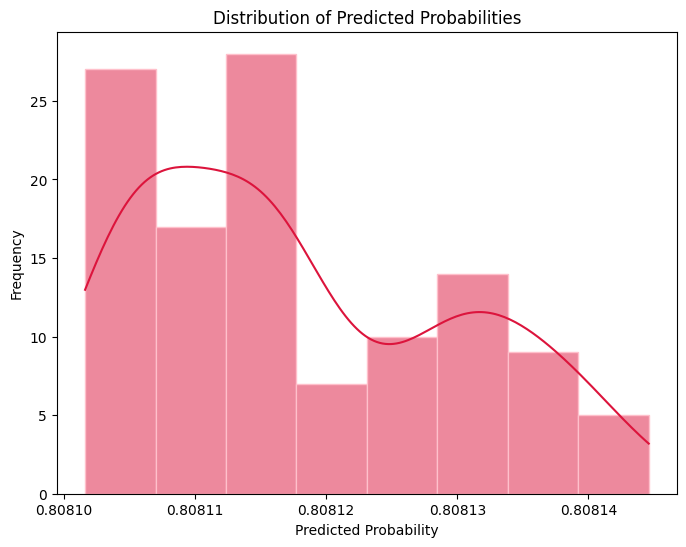

In [ ]:
# Calculating predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Visualizing the distribution of predicted probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_proba, kde=True, color="crimson", edgecolor="pink")
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

The generated graph above contains the distribution of predicted probabilities from the logistic regression model used for predicting customer feedback on online food orders.

The x-axis represents the predicted probability values which ranges from around 0.80810 to 0.80814, while the y-axis shows the frequency or count of instances with those predicted probabilities.

The distribution appears to be bimodal (two distinct peaks or modes). One peak is centered around the predicted probability value of 0.80810, and the other is around 0.80813. This suggests that the model is highly confident in its predictions and is categorizing the majority of instances into two distinct groups or classes.

But the range of predicted probability values is extremely narrow, spanning only from 0.80810 to 0.80814 which indicates that the model is consistently predicting very similar probability values for most instances, without much variation.

In an ideal scenario, for a well-performing binary classification model like logistic regression, a more spread-out distribution is much more expected, with predicted probabilities closer to 0 for one class and closer to 1 for the other class. The narrow range of predicted probabilities shown in this distribution suggests that the model may not be effectively separating the two classes or capturing the underlying patterns in the data.